# 1.Загрузить файл hr.csv.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
%matplotlib inline
import statistics
import seaborn as sns
df=pd.read_csv("HR.csv")
df['salary_level'] = df['salary']
df.loc[df['salary'] == 'low', 'salary_level'] = 0
df.loc[df['salary'] == 'medium', 'salary_level'] = 1
df.loc[df['salary'] == 'high', 'salary_level'] = 2
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

Объём данных: 14999


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


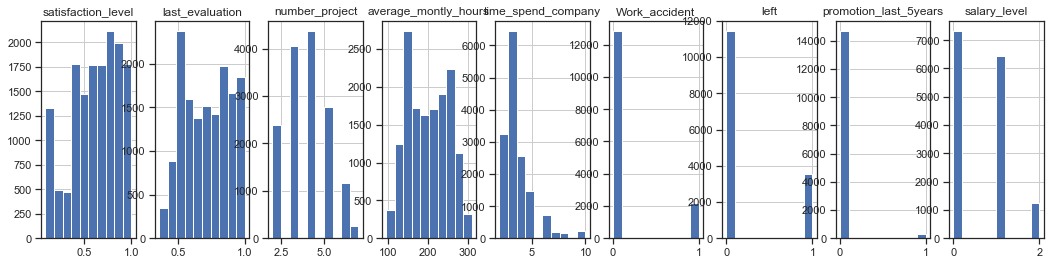

In [113]:
headers=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years','salary_level']
headers_rus=['Уровень удовлетворённости','Последняя оценка','Количество проектов','Среднемесячное количество часов','Срок работы','Несчастный случай','Уволен','Повышение за 5 лет', 'Уровень зарплаты']
spec=headers_rus

l=1
for i in headers:
    l+=1
    plt.subplot(1, len(headers)+1, l)
    df[i].hist(figsize=(20,4), label=i)
    plt.title(i)
print('Объём данных:',len(df))
df.describe()

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

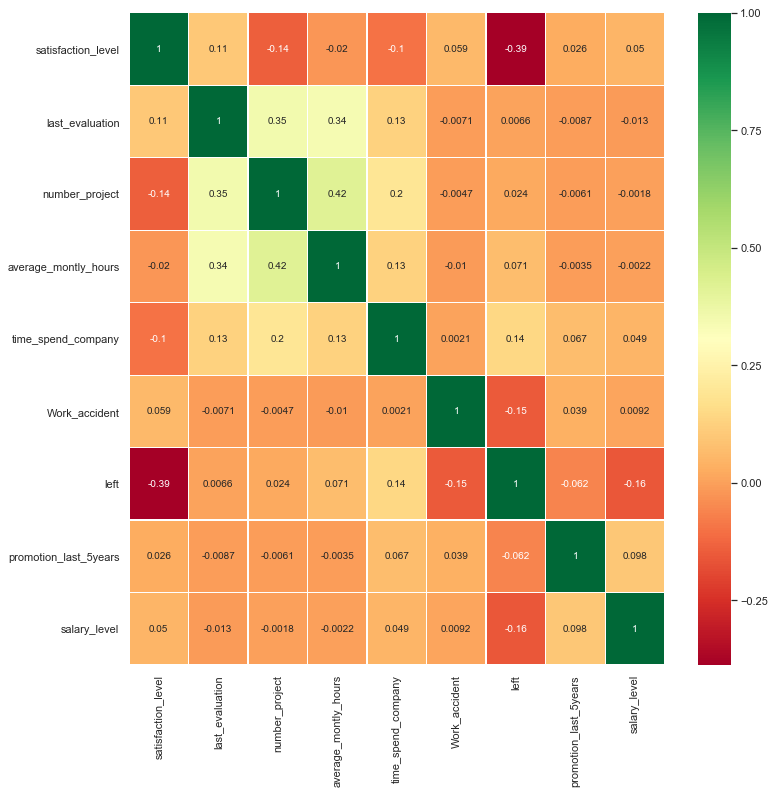

In [104]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


# 4.Визуализировать несколько взаимосвязей между переменными.
Построим попарные графики с попроектной разметкой.

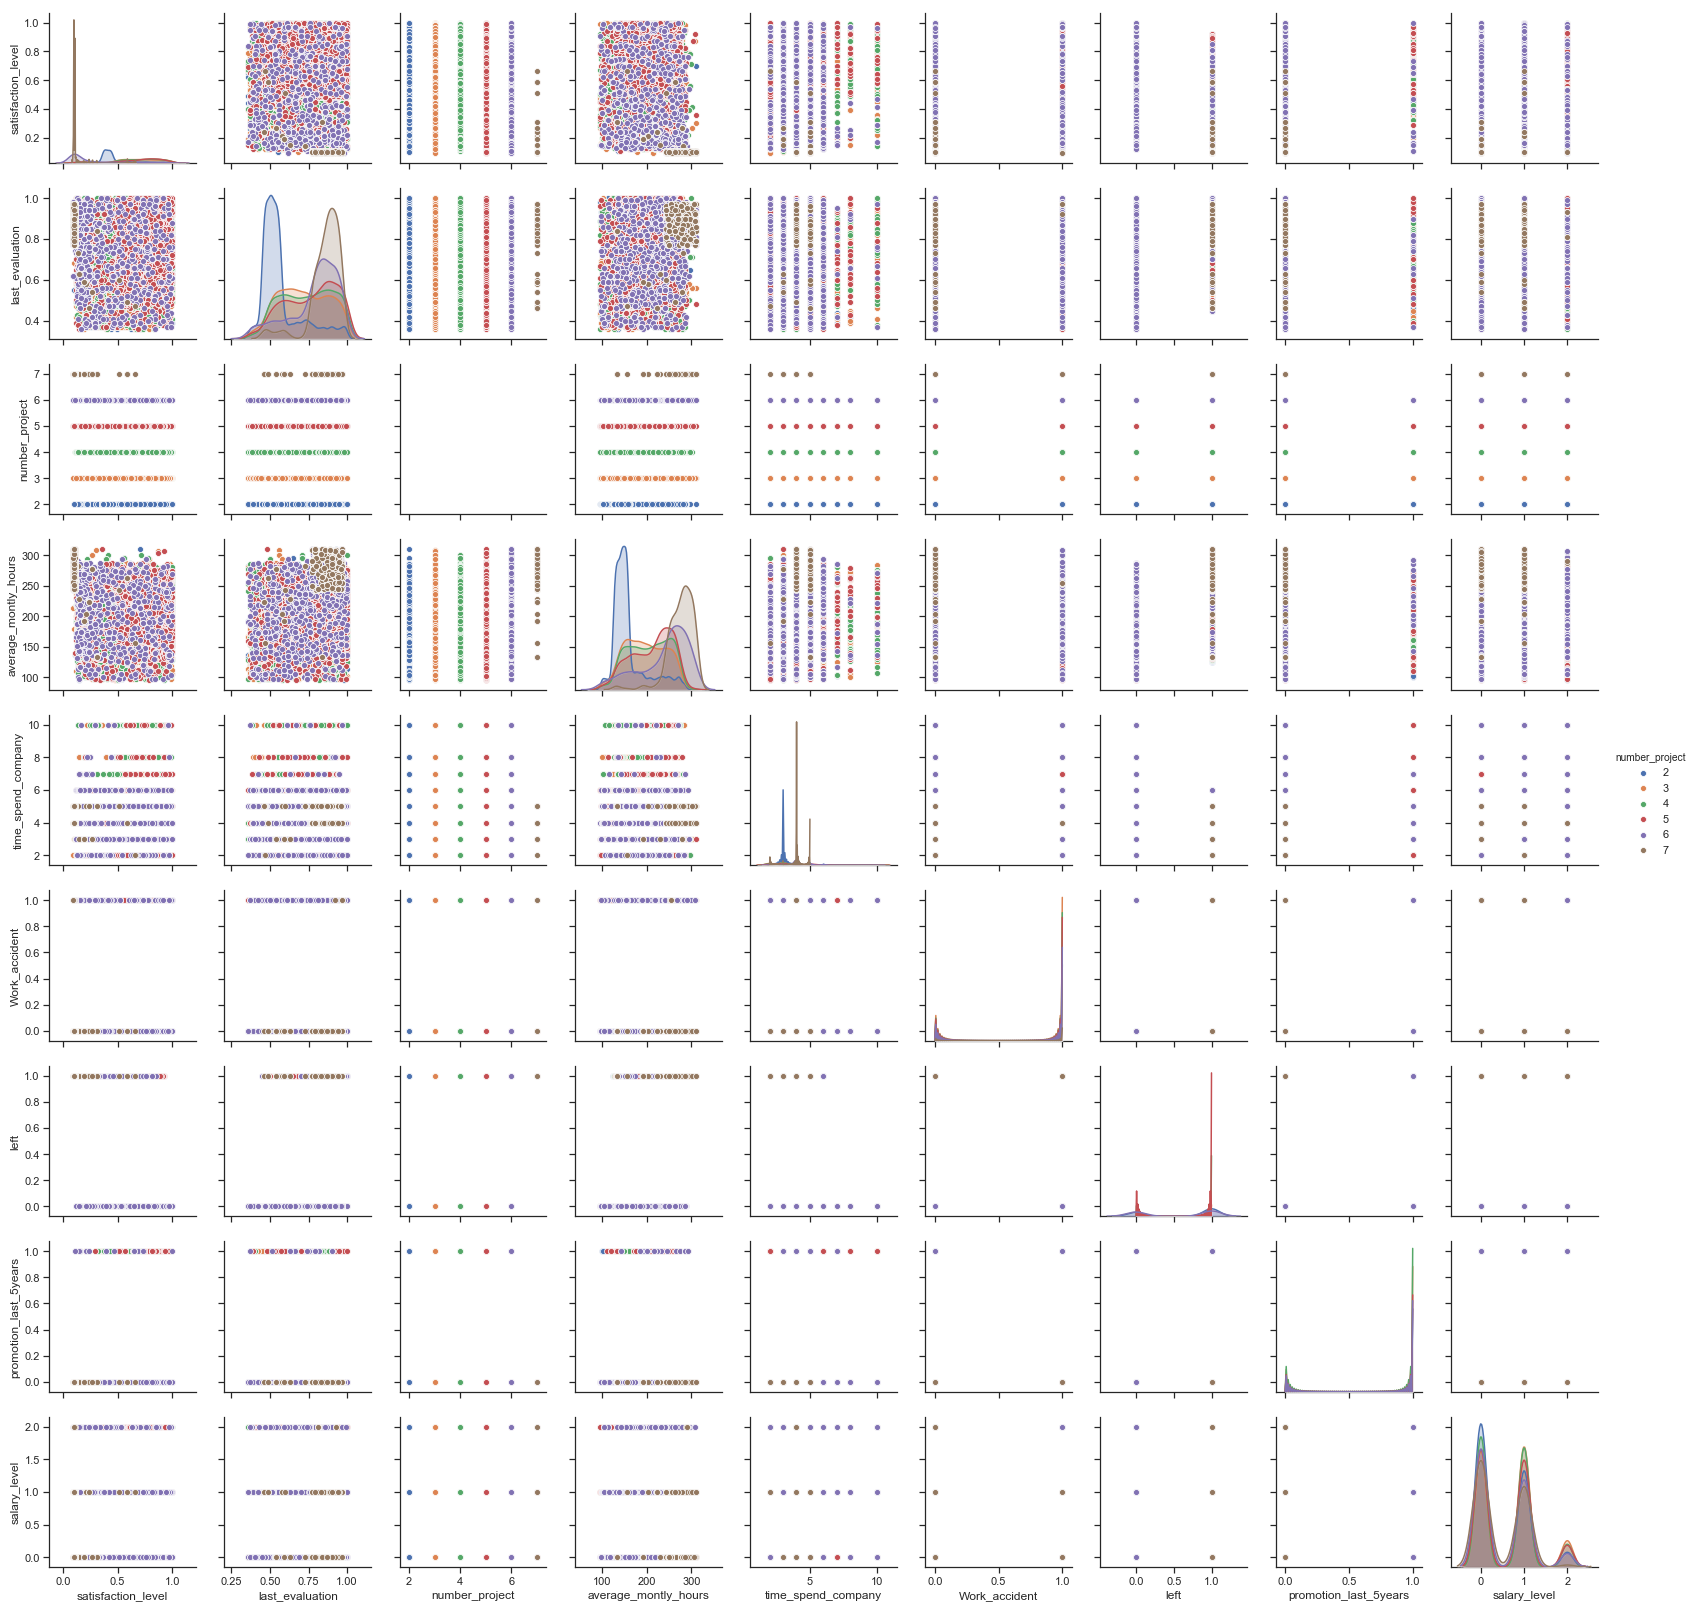

In [105]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=df, hue='number_project')

Также, отдельно визуализируем пару переменных с наибольшим коэффициентом корреляции

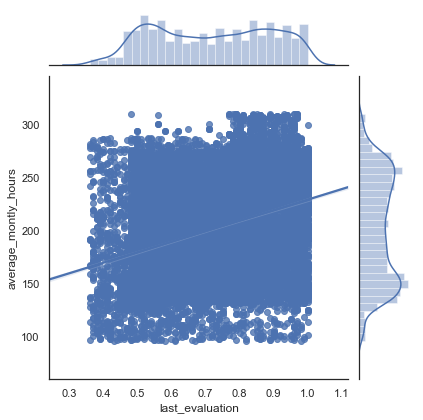

In [117]:
satisfaction_level = df['satisfaction_level']
number_project = df['number_project']
left = df['left']
last_evaluation = df['last_evaluation']
average_montly_hours = df['average_montly_hours']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=last_evaluation, y=average_montly_hours, data=df, kind='reg')

Повторим попарные графики с разбивкой по зарплатам.

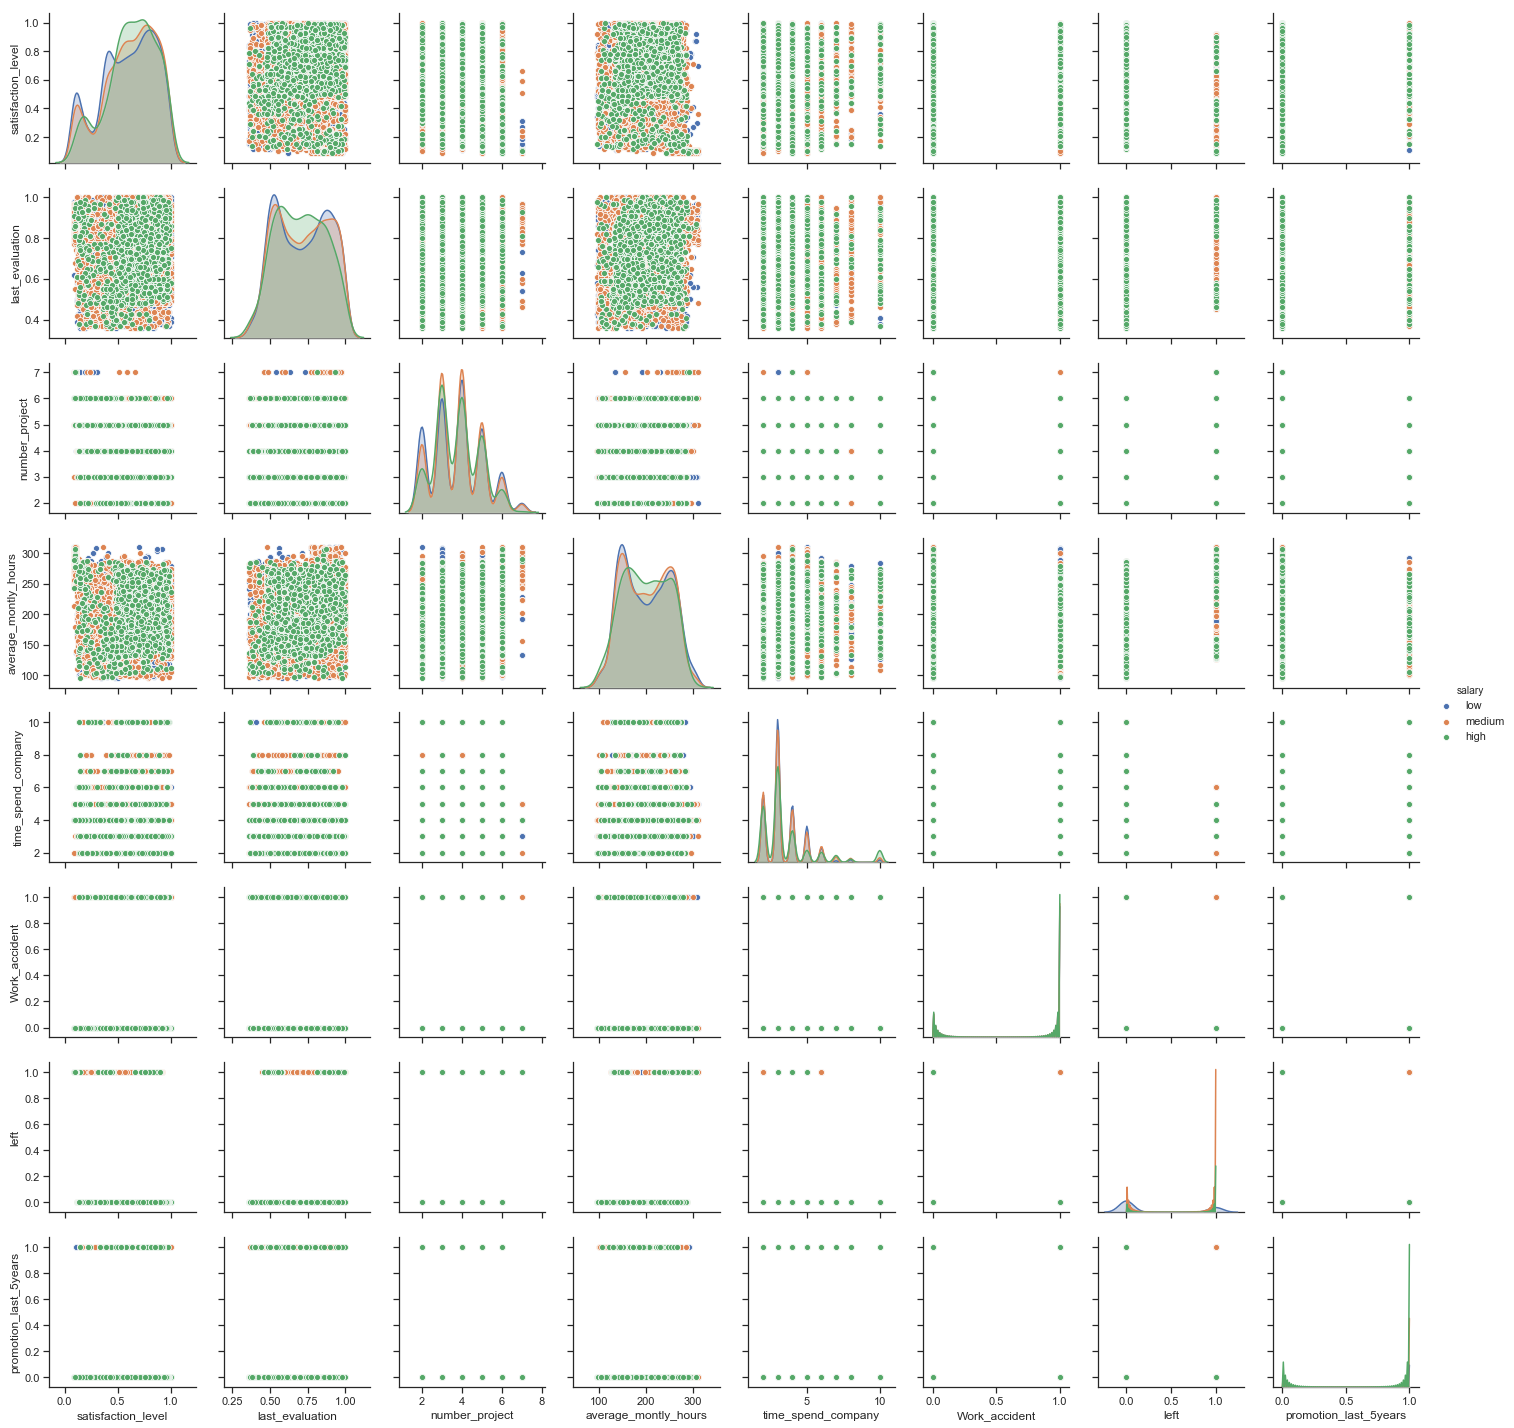

In [24]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=df, hue='salary')

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [25]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
last_evaluation1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(last_evaluation)))
number_project1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(number_project)))
average_montly_hours1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(average_montly_hours)))
satisfaction_level1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(satisfaction_level)))
left1 = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(left)))

print(stats.mannwhitneyu(last_evaluation1[0], average_montly_hours1[0]))
print(stats.mannwhitneyu(last_evaluation1[0], number_project1[0]))
print(stats.mannwhitneyu(average_montly_hours1[0], number_project1[0]))
print(stats.mannwhitneyu(satisfaction_level1[0], left1[0]))
print(stats.mannwhitneyu(number_project1[0], left1[0]))

MannwhitneyuResult(statistic=96003968.0, pvalue=2.387748330195769e-107)
MannwhitneyuResult(statistic=67332400.0, pvalue=0.0)
MannwhitneyuResult(statistic=78688197.0, pvalue=0.0)
MannwhitneyuResult(statistic=54675659.0, pvalue=0.0)
MannwhitneyuResult(statistic=66749373.0, pvalue=0.0)


C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Взаимосвязей нет

# 6.Рассчитать сколько работников работает в каждом департаменте.


In [130]:
df.groupby(['sales'])['sales'].count()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: sales, dtype: int64

# 7.Показать распределение сотрудников по зарплатам.

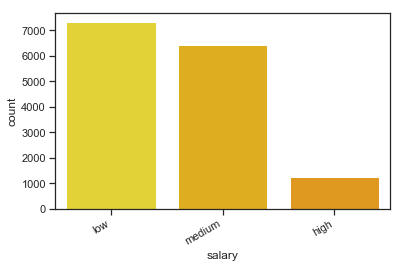

In [26]:
fig,ax=plt.subplots()
sns.countplot(x='salary',data=df,palette='Wistia')
fig.autofmt_xdate()

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

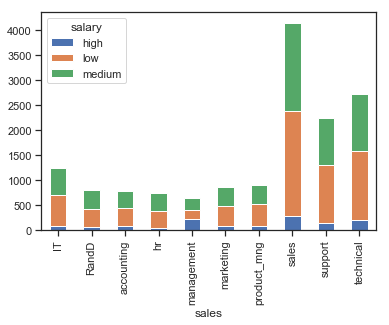

In [27]:
df_plot = df.groupby(['salary', 'sales']).size().reset_index().pivot(columns='salary', index='sales', values=0)
df_plot.plot(kind='bar', stacked=True)

# 9.Сколько сотрудников покинули компанию.

In [28]:
df[df['left']==1]['left'].count()

3571

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Визуализируем покинувших компанию на парных графиках

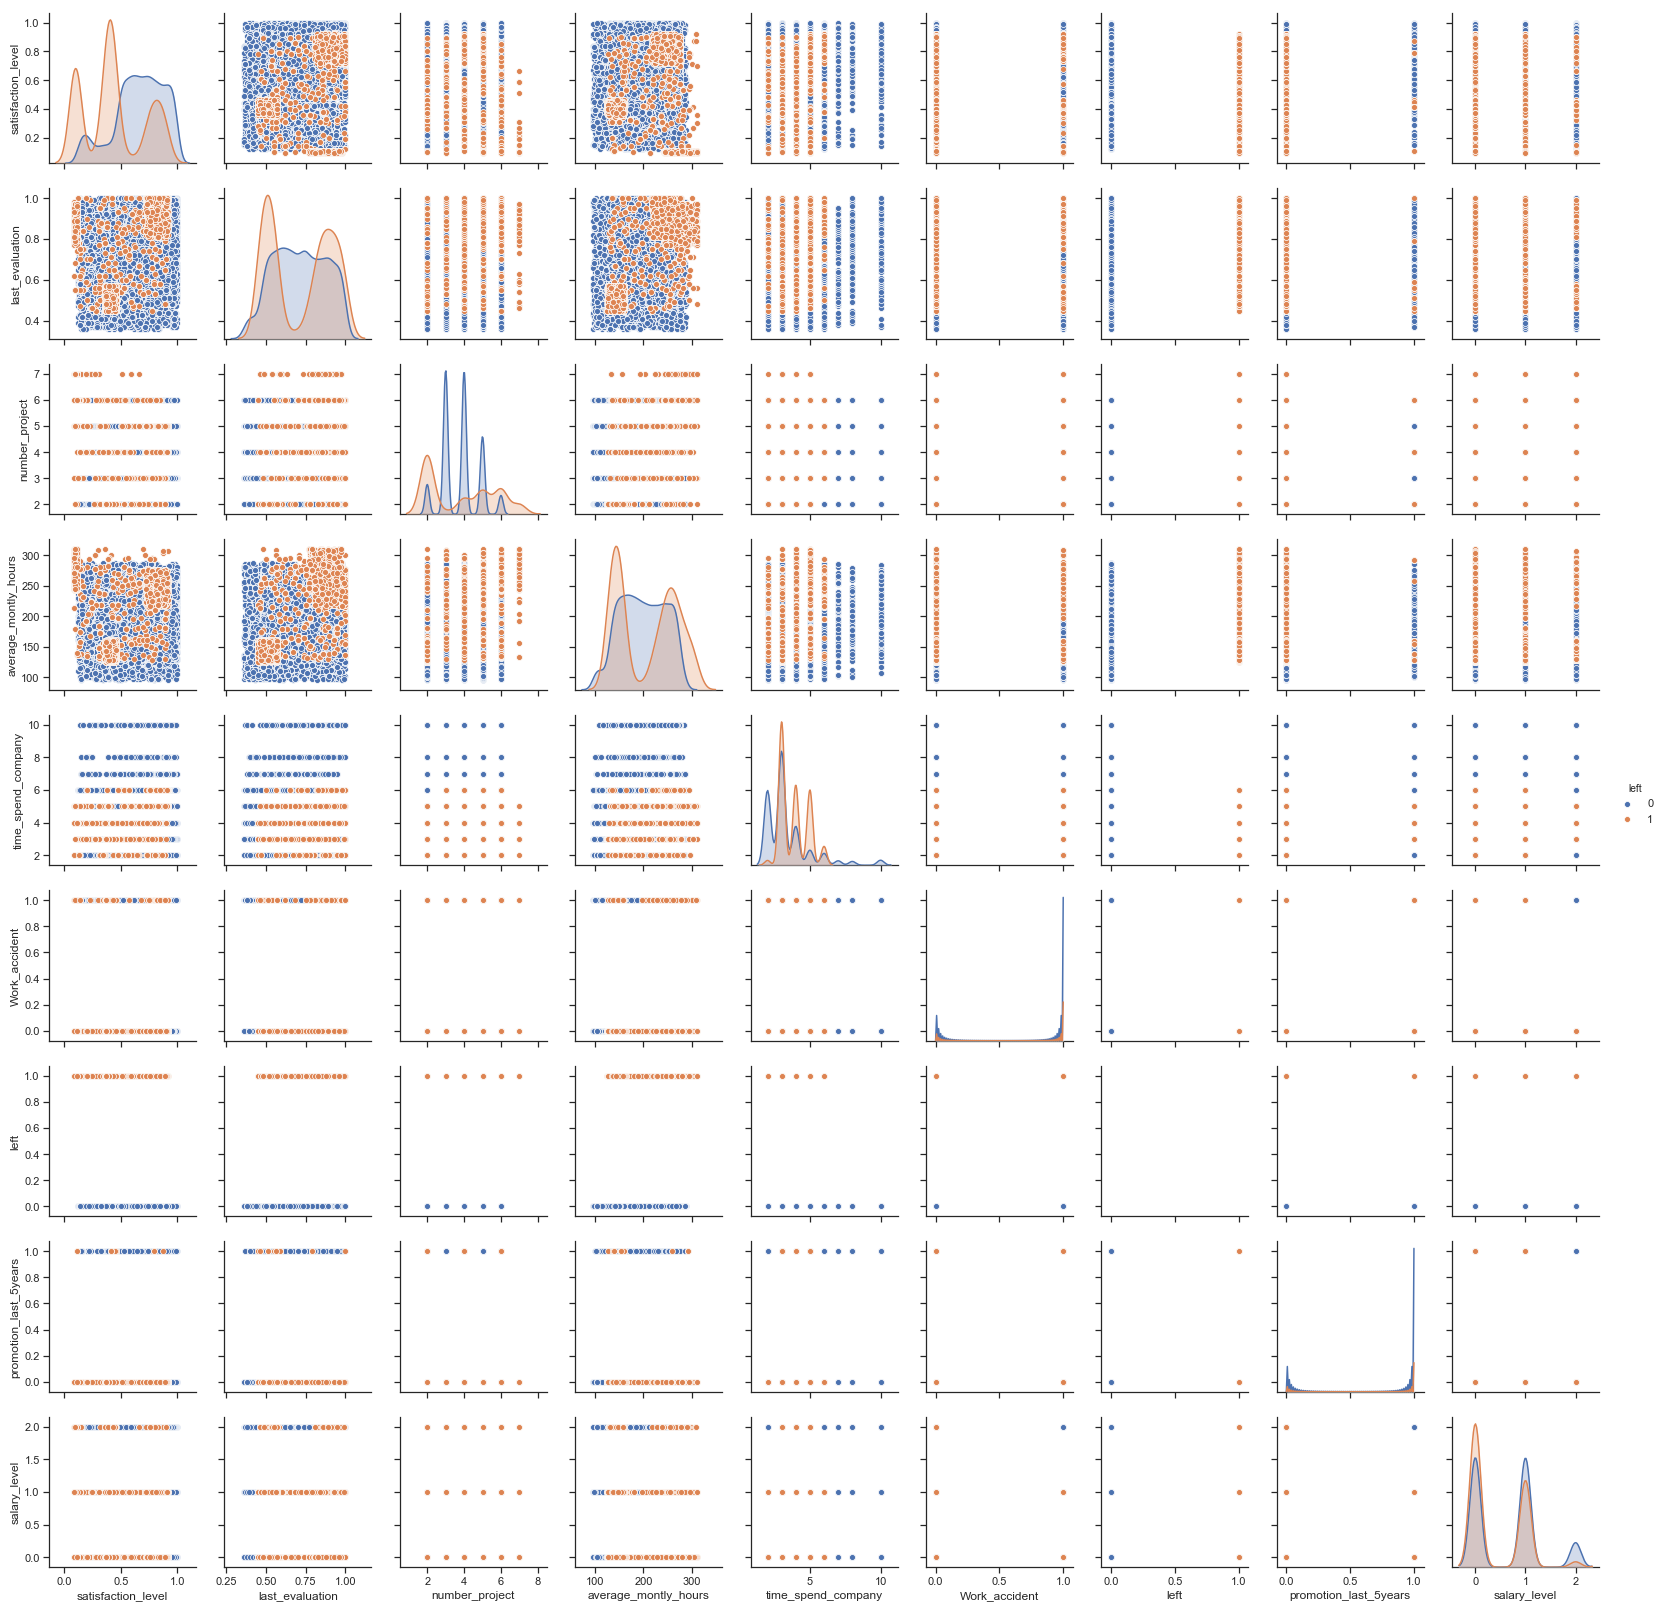

In [106]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=df, hue='left')

Визуализируем отедльно уволенных на графиках зависимостей

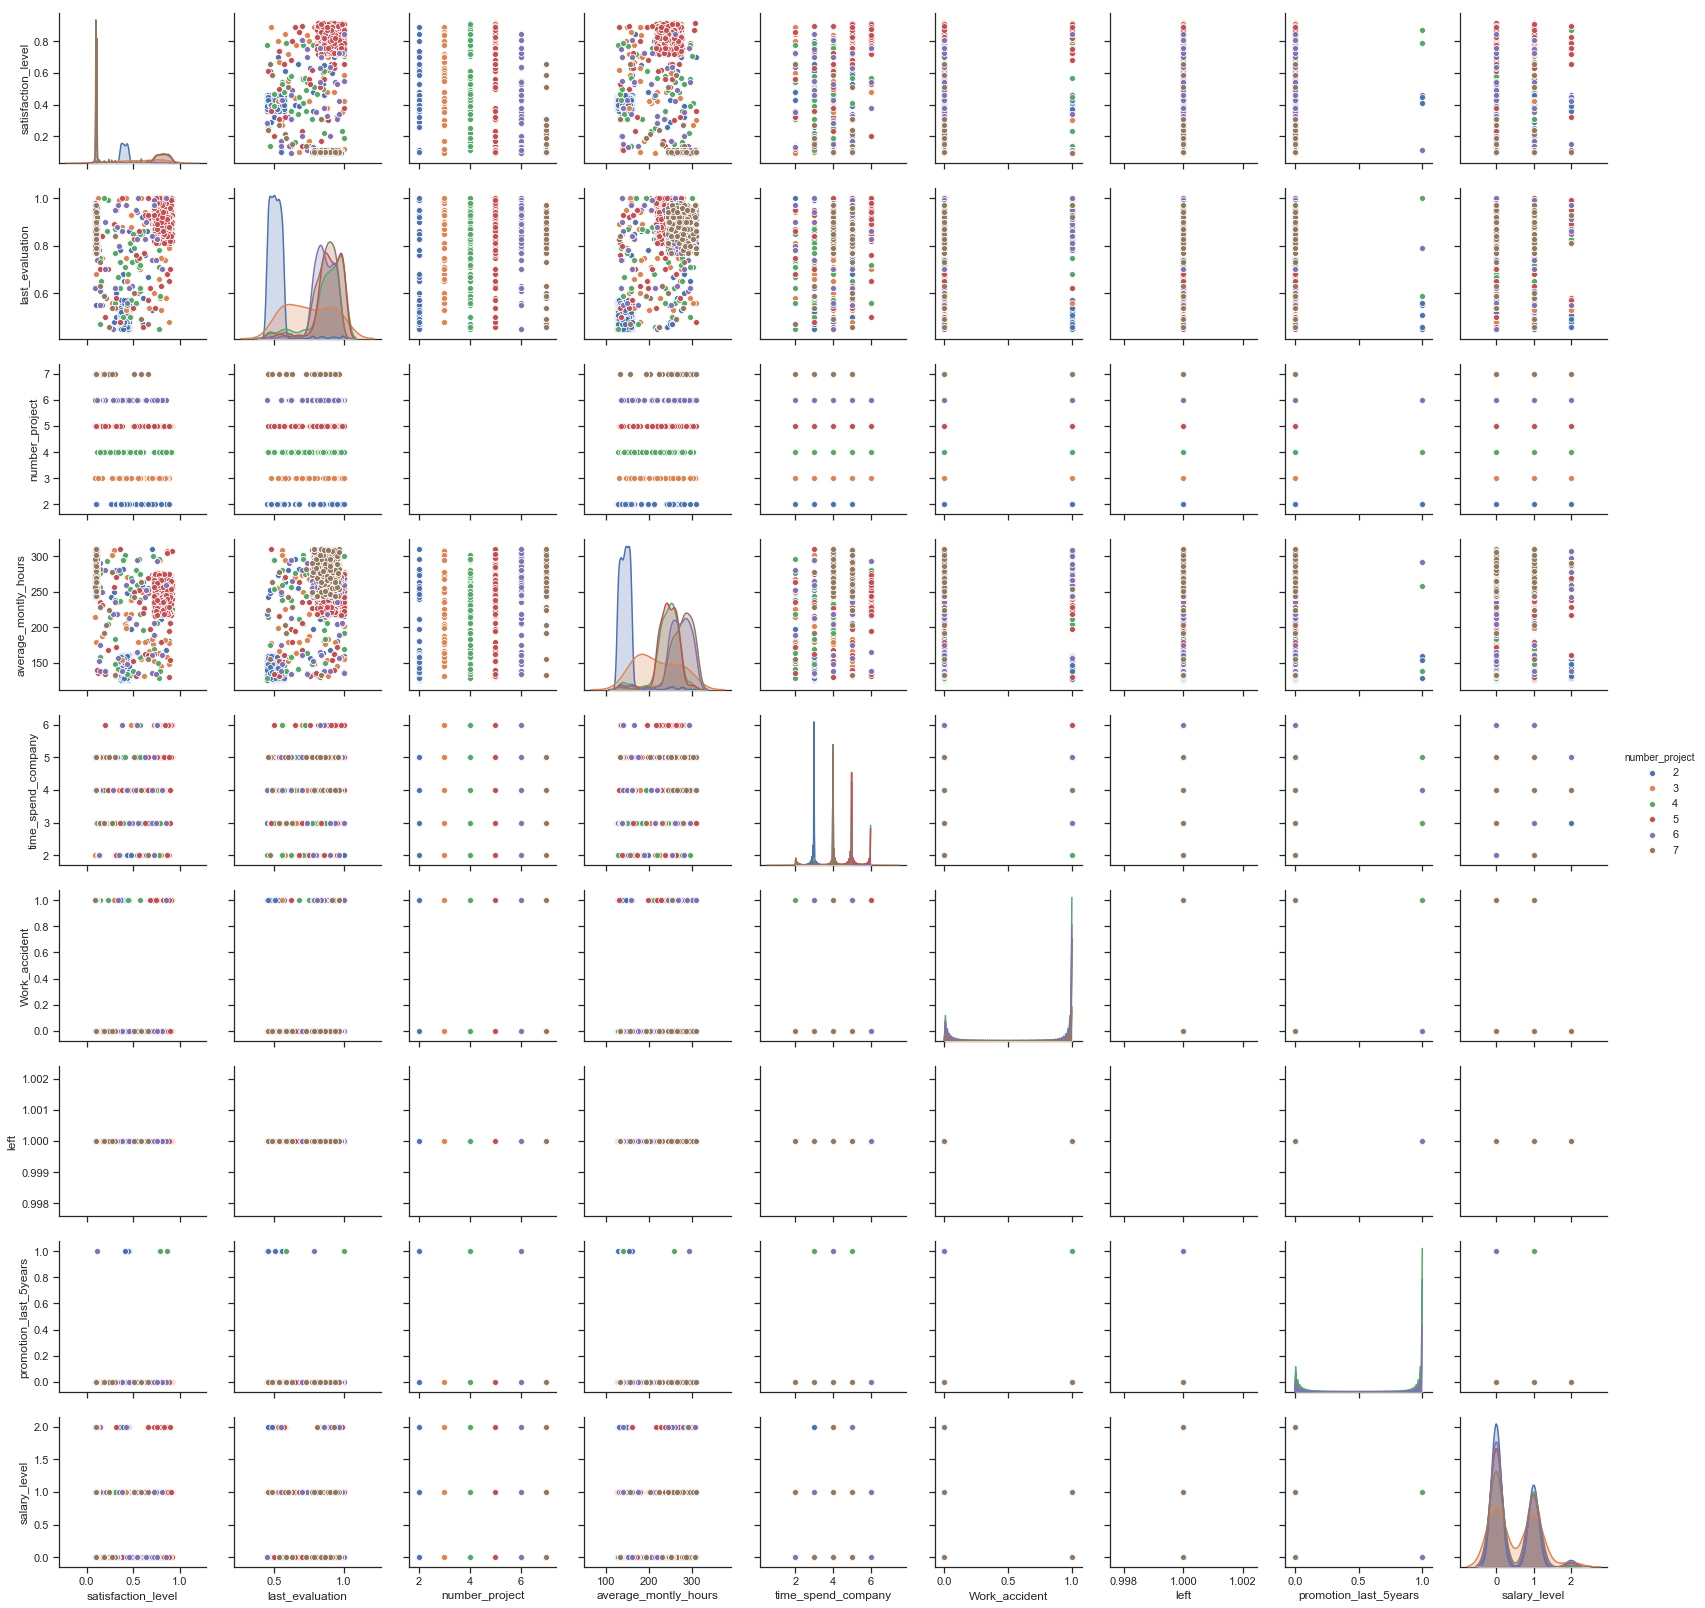

In [107]:
df_left=df[df['left']==1]
df_not_left=df[df['left']==0]
g = sns.pairplot(data=df_left, hue='number_project')


Явно видны уплотнения. Посмотрим, есть ли зависимость для сегмента уволенных.

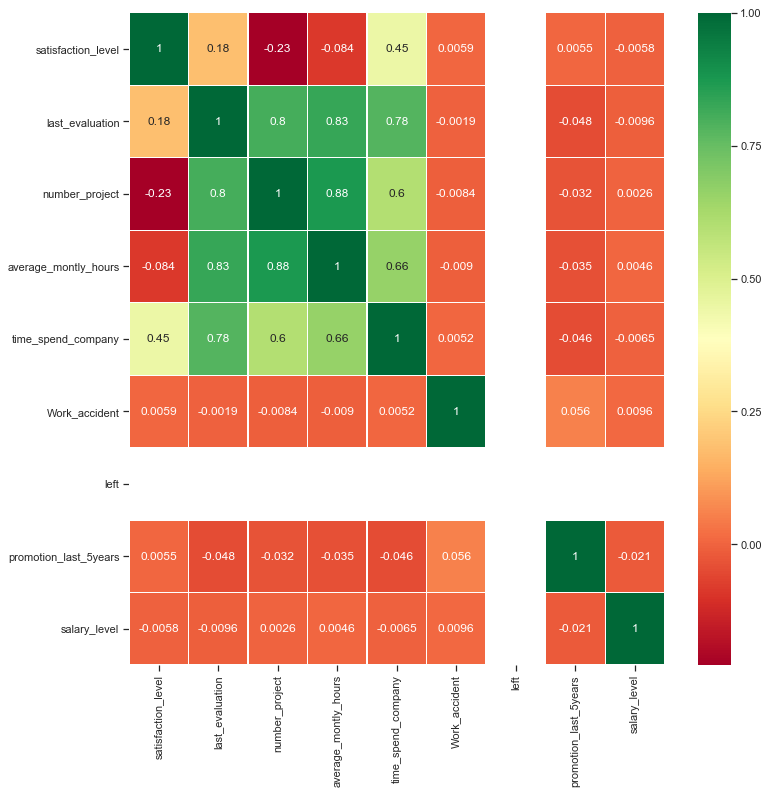

In [108]:
sns.heatmap(df_left.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Посмотрим коррелирующие данные и сравним их с продолжающими работать сотрудниками

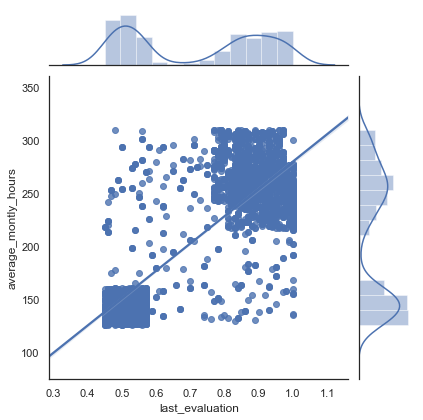

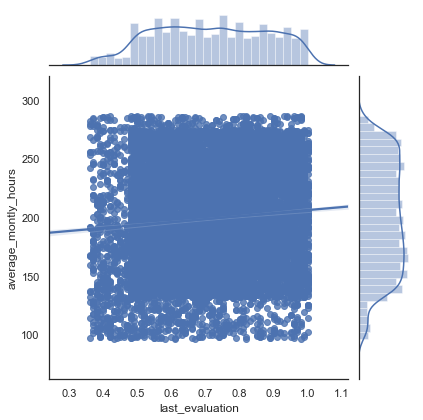

In [33]:
g = sns.jointplot(x=last_evaluation, y=average_montly_hours, data=df_left, kind='reg')
g = sns.jointplot(x=df_not_left['last_evaluation'], y=df_not_left['average_montly_hours'], data=df_not_left, kind='reg')

## Попробуем выделить группу риска

Зададим границы уплотнений на графиках зависимостей, чтобы выделить группы риска.

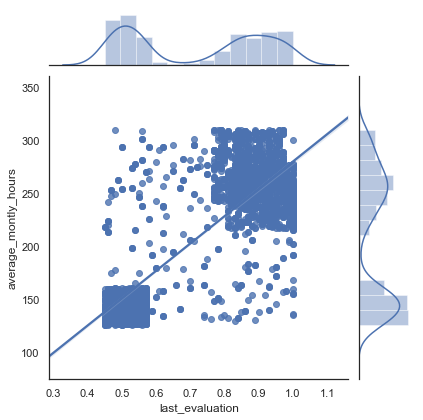

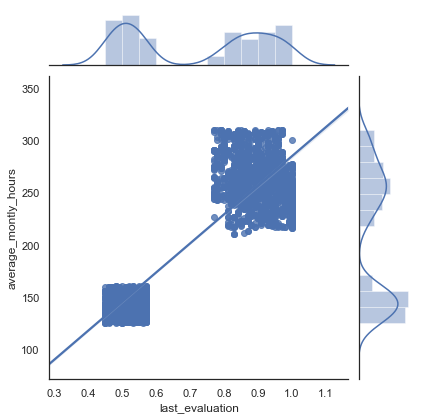

In [36]:
df_filtered=df_left[((df_left['last_evaluation']>0.75) & (df_left['average_montly_hours']>210)) | ((df_left['last_evaluation']<0.59)  & (df_left['average_montly_hours']<165))]
g = sns.jointplot(x=df_left['last_evaluation'], y=df_left['average_montly_hours'], data=df_left, kind='reg')
g = sns.jointplot(x=df_filtered['last_evaluation'], y=df_filtered['average_montly_hours'], data=df_filtered, kind='reg')

Сделаем это для каждой пары переменных

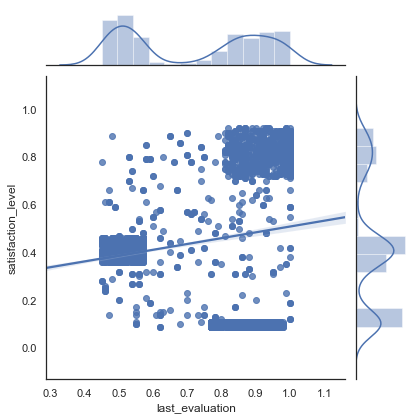

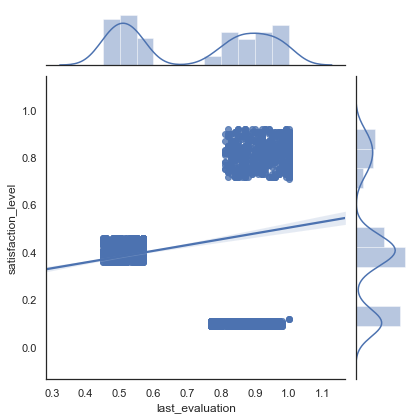

In [37]:
df_filtered2=df_filtered[(
    (
        (
            (df_filtered['last_evaluation']>0.80) & (df_filtered['satisfaction_level']>0.7)
        ) 
        | 
        (
            (df_filtered['last_evaluation']>0.76) & (df_filtered['satisfaction_level']<0.17)
        )
    )
    | 
    (
        ((df_filtered['last_evaluation']<0.6) & (df_filtered['satisfaction_level']<0.5))
         & (df_filtered['satisfaction_level']>0.35)
    )
      )]
g = sns.jointplot(x=df_left['last_evaluation'], y=df_left['satisfaction_level'], data=df_left, kind='reg')
g = sns.jointplot(x=df_filtered2['last_evaluation'], y=df_filtered2['satisfaction_level'], data=df_filtered2, kind='reg')

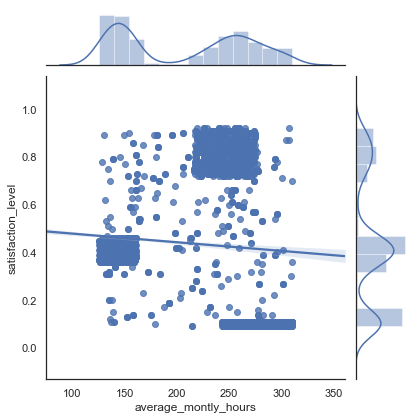

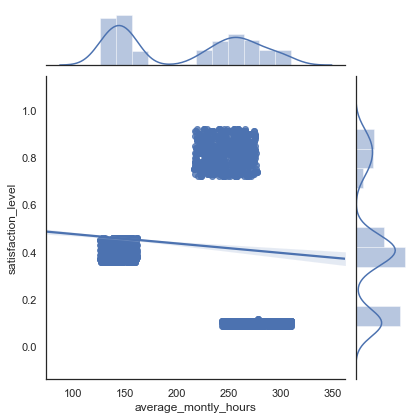

In [38]:
df_filtered3=df_filtered2[(
    (
        (
           ((df_filtered2['average_montly_hours']<330) & (df_filtered2['satisfaction_level']<0.13))
         & ((df_filtered2['average_montly_hours']>240) & (df_filtered2['satisfaction_level']>0))
        ) 
        | 
        (
           ((df_filtered2['average_montly_hours']<170) & (df_filtered2['satisfaction_level']<0.5))
         & ((df_filtered2['average_montly_hours']>125) & (df_filtered2['satisfaction_level']>0.34))
        )
    )
    | 
    (
        ((df_filtered2['average_montly_hours']<279) & (df_filtered2['satisfaction_level']<0.95))
         & ((df_filtered2['average_montly_hours']>215) & (df_filtered2['satisfaction_level']>0.7))
    )
      )]
g = sns.jointplot(x=df_left['average_montly_hours'], y=df_left['satisfaction_level'], data=df_left, kind='reg')
g = sns.jointplot(x=df_filtered3['average_montly_hours'], y=df_filtered3['satisfaction_level'], data=df_filtered3, kind='reg')

Построим графики зависимостей для отфильтрованных данных

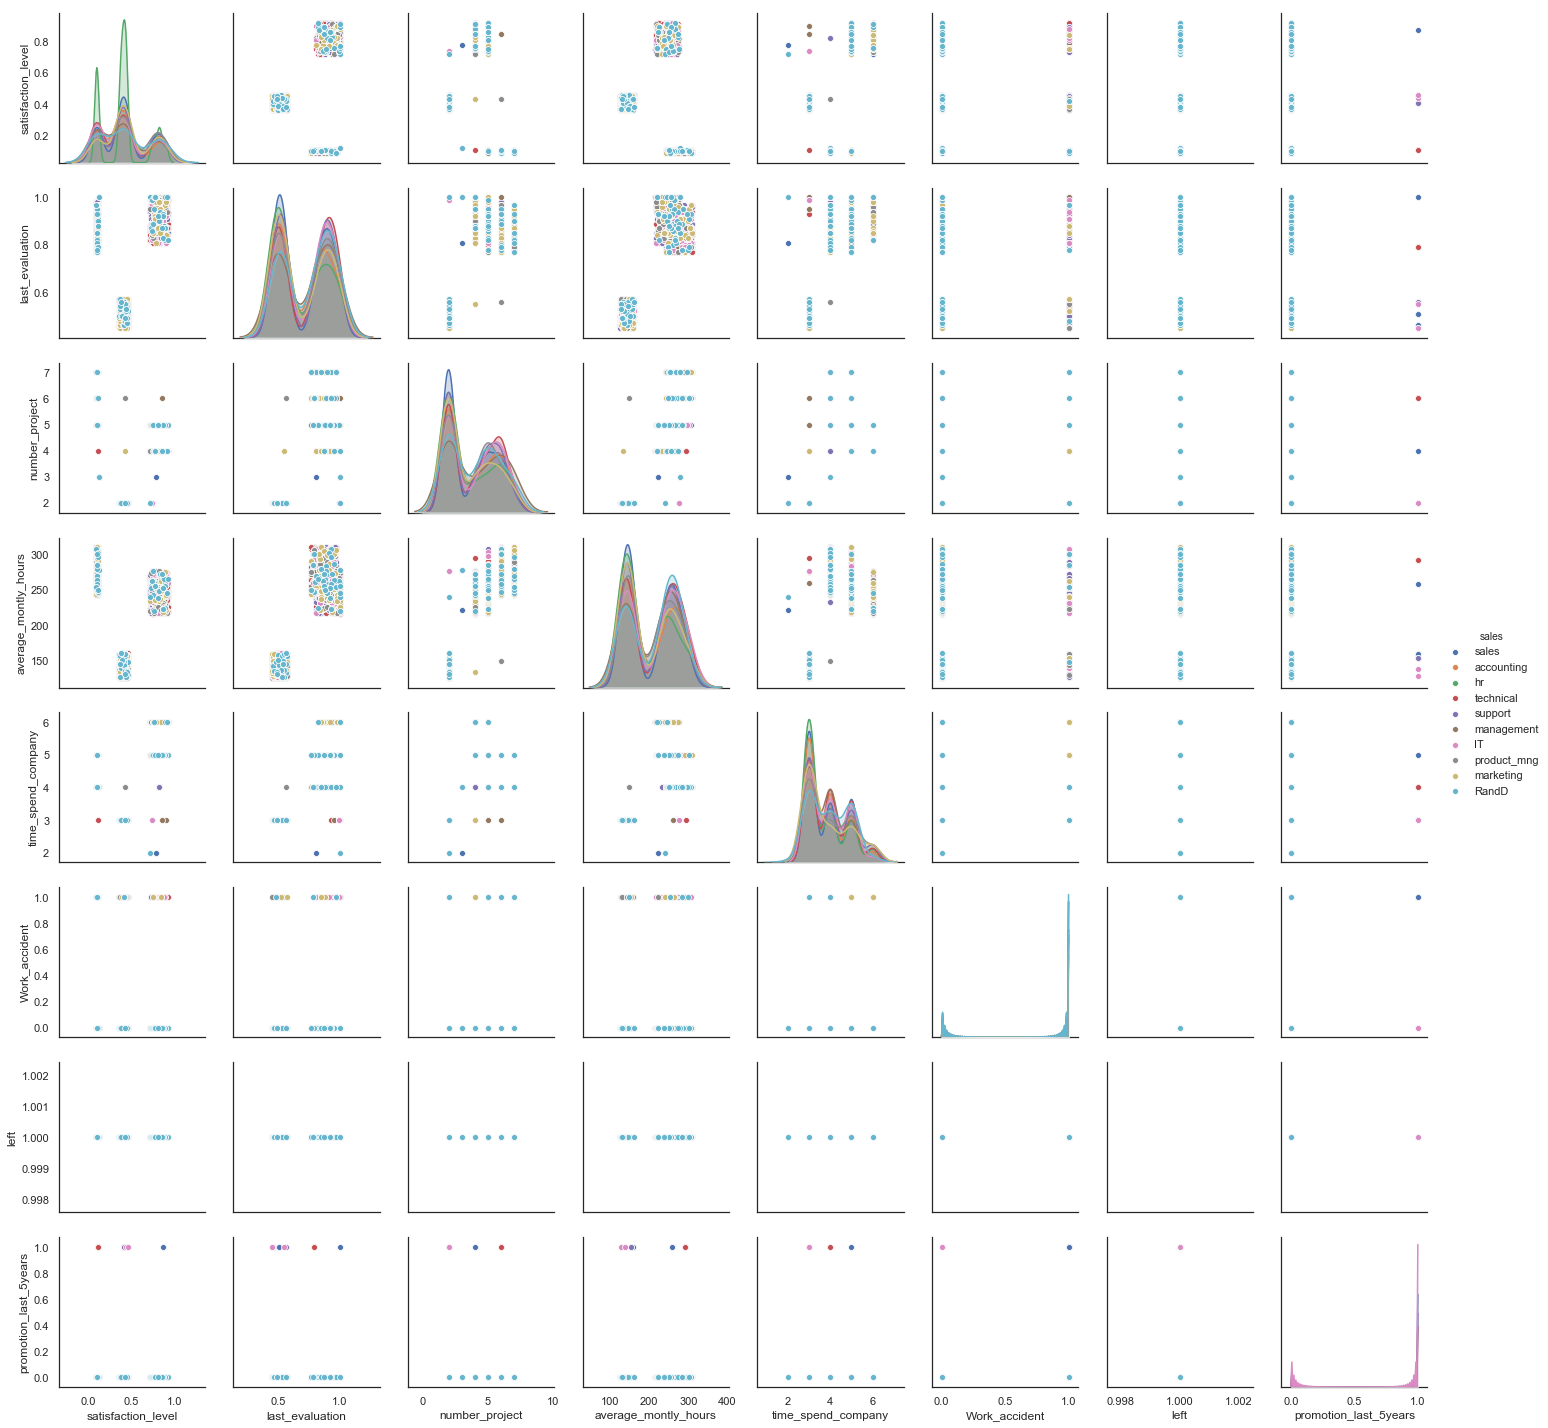

In [132]:
g = sns.pairplot(data=df_filtered3, hue='sales')

Чётко видны три группы увольняющихся в трёх проекциях.

## Посмотрим долю уволенных, подпадающих под критерии

In [40]:
print(df_filtered3['last_evaluation'].count()/df_left['last_evaluation'].count())

0.9106692803136376


Повторим фильтр для основной выборки и оценим долю уволившихся в группе риска

In [42]:
df_risk=df[((df['last_evaluation']>0.75) & (df['average_montly_hours']>210)) | ((df['last_evaluation']<0.59)  & (df['average_montly_hours']<165))]
df_risk=df_risk[(
    (
        (
            (df_risk['last_evaluation']>0.80) & (df_risk['satisfaction_level']>0.7)
        ) 
        | 
        (
            (df_risk['last_evaluation']>0.76) & (df_risk['satisfaction_level']<0.17)
        )
    )
    | 
    (
        ((df_risk['last_evaluation']<0.6) & (df_risk['satisfaction_level']<0.5))
         & (df_risk['satisfaction_level']>0.35)
    )
      )]
df_risk=df_risk[(
    (
        (
           ((df_risk['average_montly_hours']<330) & (df_risk['satisfaction_level']<0.13))
         & ((df_risk['average_montly_hours']>240) & (df_risk['satisfaction_level']>0))
        ) 
        | 
        (
           ((df_risk['average_montly_hours']<170) & (df_risk['satisfaction_level']<0.5))
         & ((df_risk['average_montly_hours']>125) & (df_risk['satisfaction_level']>0.34))
        )
    )
    | 
    (
        ((df_risk['average_montly_hours']<279) & (df_risk['satisfaction_level']<0.95))
         & ((df_risk['average_montly_hours']>215) & (df_risk['satisfaction_level']>0.7))
    )
      )]
print(df_risk[df_risk['left']==1]['left'].count()/df_risk['left'].count())
print(df[df['left']==1]['left'].count()/df['left'].count())

0.8203834510595358
0.2380825388359224


В группе риска вероятность увольнения в 3,5 раза выше. Сравним метрики групп.

Объём данных: 14999


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,0.495119,0.741423,3.808527,211.507568,3.757568,0.070888,0.820383,0.010595
std,0.281474,0.199668,1.718057,59.046005,1.088098,0.256670,0.383916,0.102400
min,0.090000,0.360000,2.000000,126.000000,2.000000,0.000000,0.000000,0.000000
25%,0.370000,0.520000,2.000000,148.000000,3.000000,0.000000,1.000000,0.000000
50%,0.430000,0.830000,4.000000,233.000000,3.000000,0.000000,1.000000,0.000000
75%,0.790000,0.920000,5.000000,260.000000,5.000000,0.000000,1.000000,0.000000
max,0.940000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


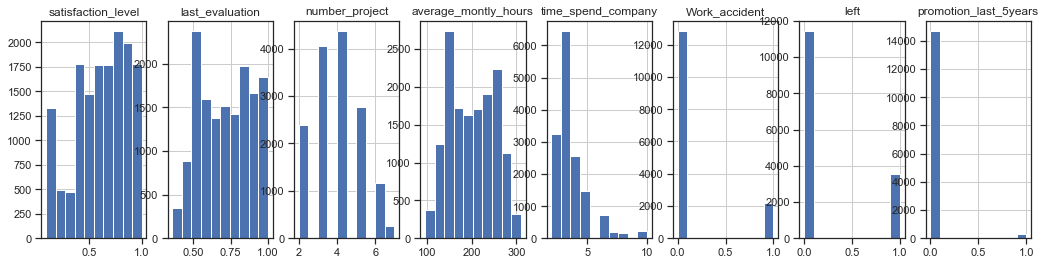

In [114]:
headers=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']
headers_rus=['Уровень удовлетворённости','Последняя оценка','Количество проектов','Среднемесячное количество часов','Срок работы','Несчастный случай','Уволен','Повышение за 5 лет']

l=1
for i in headers:
    l+=1
    plt.subplot(1, len(headers)+1, l)
    df[i].hist(figsize=(20,4), label=i)
    plt.title(i)
print('Объём данных:',len(df))
df_risk.describe()

Объём данных: 14999


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


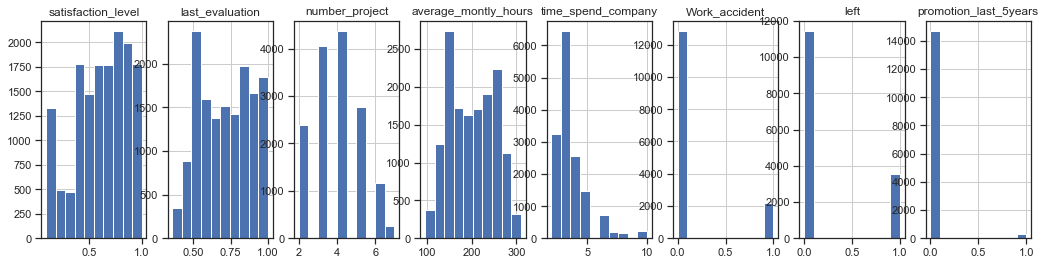

In [115]:
l=1
for i in headers:
    l+=1
    plt.subplot(1, len(headers)+1, l)
    df[i].hist(figsize=(20,4), label=i)
    plt.title(i)
print('Объём данных:',len(df))
df.describe()

In [45]:
print('Выделена группа риска, её доля в выборке:',len(df_risk[df_risk['left']==0])/len(df[df['left']==0]))

Выделена группа риска, её доля в выборке: 0.06230311515575779


## Итоги

Среди сотрудников есть группа риска, состоящия из трёх подгрупп, которые определяются диапазонами трёх параметров: давности повышения, уровня удовлетворённости, количества отработанных часов. В сумме группа риска доходит до 6,2% работаюших. Работникам, у которых возникают обнаруженные сочетания параметров рекомендуется выводить эти параметры из зоны риска изменяя нагрузку или повышая их. Опишем диапазоны парметров для каждой из подгрупп.

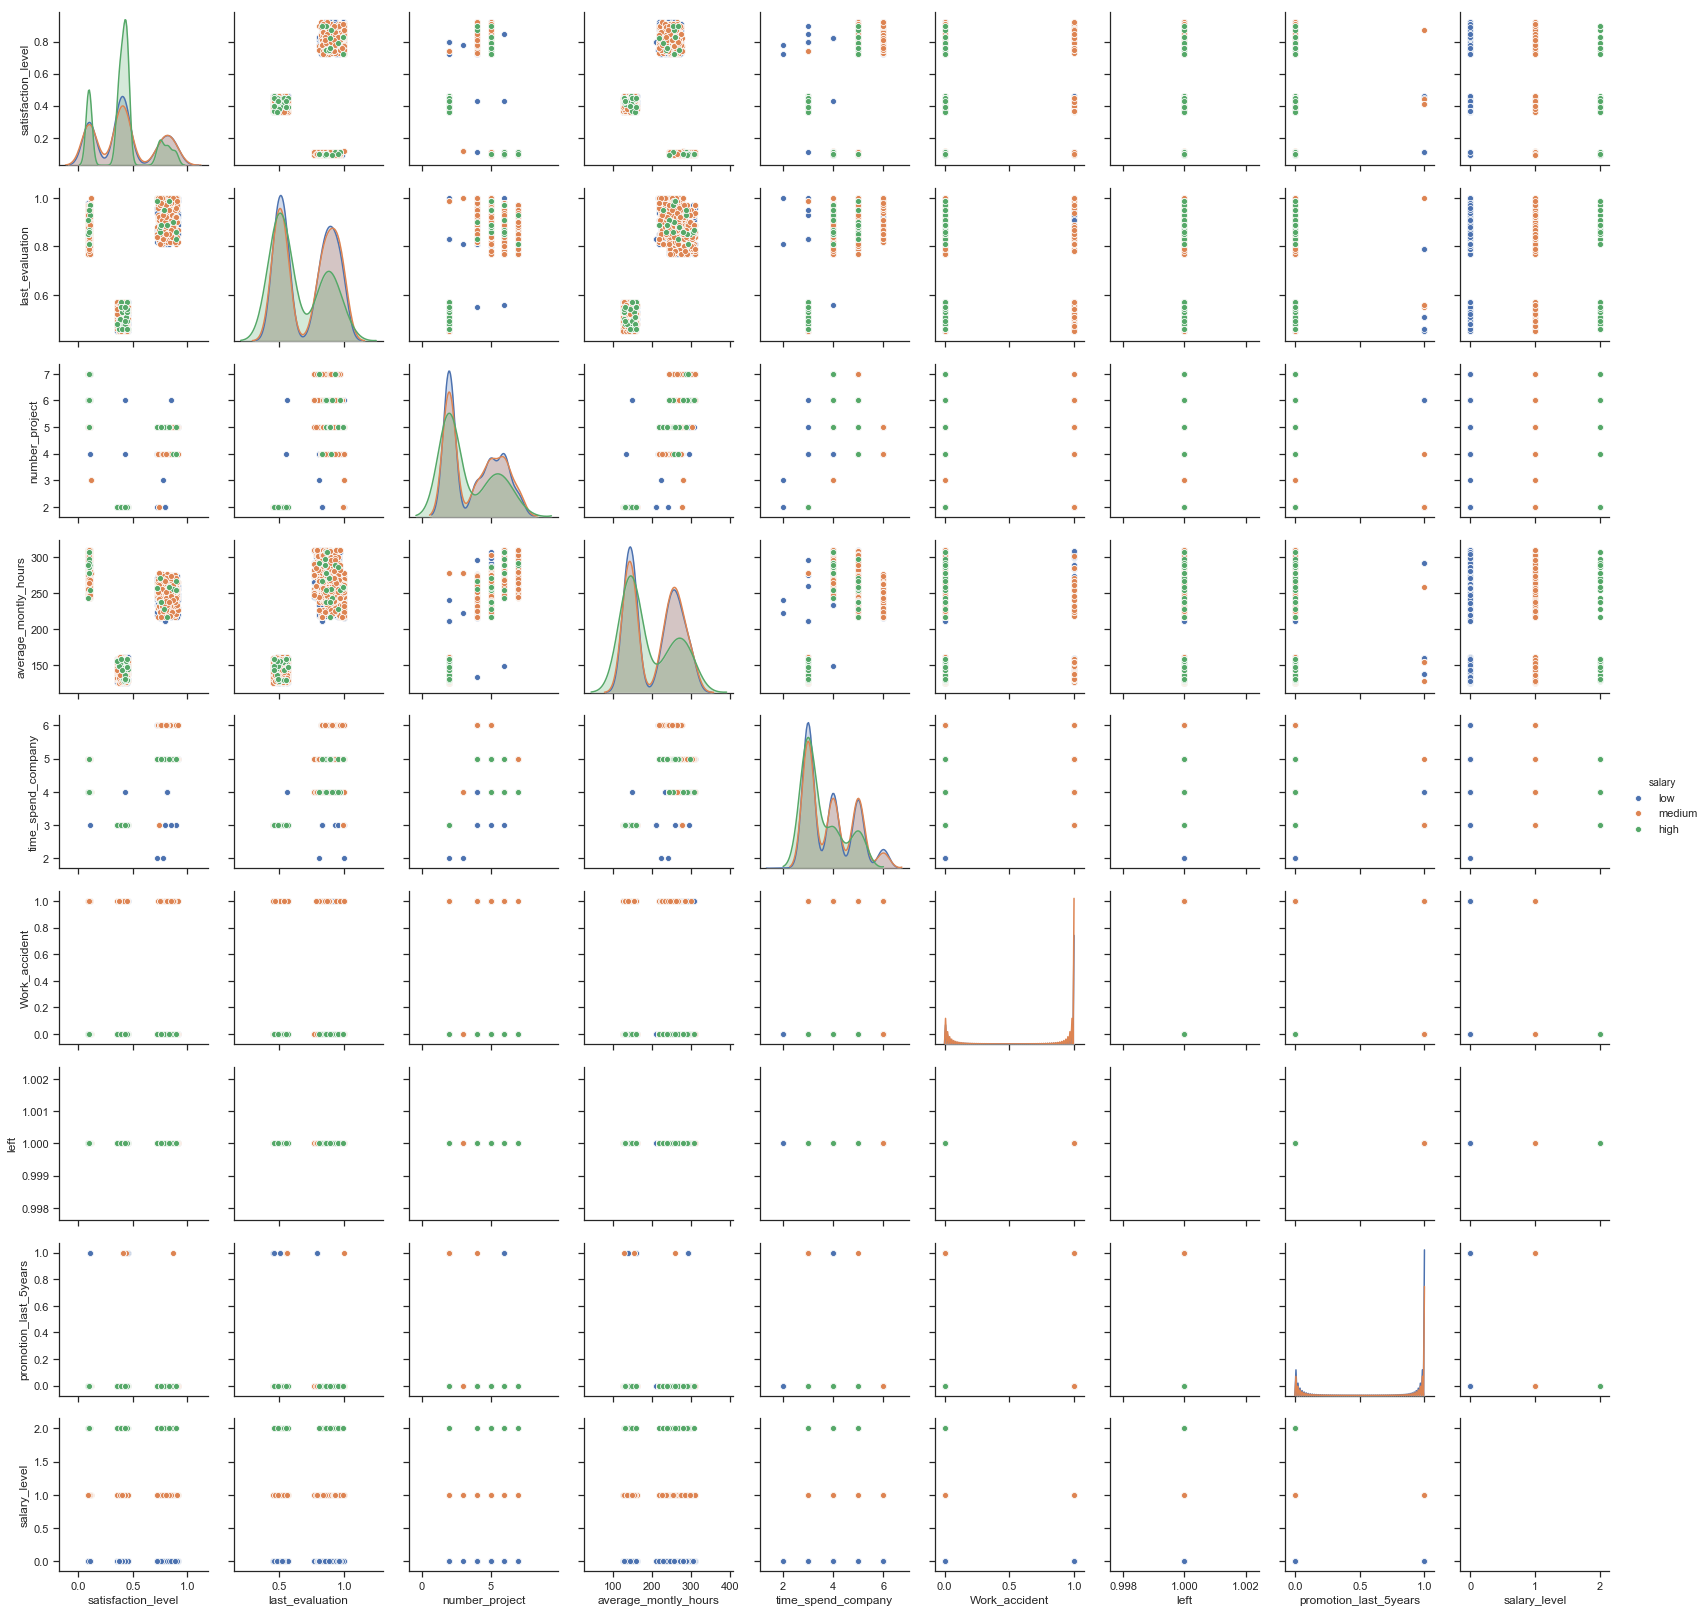

In [116]:
df_g1=df[(((df['satisfaction_level']>0.7) & (df['last_evaluation']>0.8)) & ((df['average_montly_hours']>210) & (df['average_montly_hours']<279)))]
df_g2=df[(((df['average_montly_hours']>240) & (df['satisfaction_level']<0.13)) & (df['last_evaluation']>0.74))]
df_g3=df[(((df['last_evaluation']<0.6) & ((df['average_montly_hours']<170) & (df['average_montly_hours']>125))) & ((df['satisfaction_level']>0.34) & (df['satisfaction_level']<0.5)))]
df_risk2=df[(((((df['satisfaction_level']>0.7) & (df['last_evaluation']>0.8)) & ((df['average_montly_hours']>210) & (df['average_montly_hours']<279))) | (((df['average_montly_hours']>240) & (df['satisfaction_level']<0.13)) & (df['last_evaluation']>0.74))) | (((df['last_evaluation']<0.6) & ((df['average_montly_hours']<170) & (df['average_montly_hours']>125))) & ((df['satisfaction_level']>0.34) & (df['satisfaction_level']<0.5))))]
g = sns.pairplot(data=df_risk2[df_risk2['left']==1], hue='salary')

#### Подгруппа 1 (самые высокопродуктивные работники, которым нравится работа):
'satisfaction_level'>0.7

'last_evaluation'>0.8

'average_montly_hours'>210

'average_montly_hours'<279

#### Подгруппа 2 (перегруженные работники, которым работа не нравится):


'average_montly_hours'>240

'satisfaction_level'<0.13

'last_evaluation'>0.74
                                                                      

#### Подгруппа 3 (недогруженные работники с невысокой оценкой и удовлетворённостью):
'last_evaluation'<0.6

'average_montly_hours'>125

'average_montly_hours'<170

'satisfaction_level'>0.34

'satisfaction_level'<0.5


Для подгруппы 2 следует снижать нагрузку, одновременно пытаясь увеличить удовлетворённость от работы. Для подгруппы 3 следует увелиить загруженность, одновременно обучая и повышая уровень удовлетворённости от работы. Сложнее всего с подгруппой 1: посмотрим распределение заработной платы среди работающих и уволенных работников этой подгруппы.

In [137]:
df_g1[df_g1['left']==1].groupby(['salary'])['salary'].count()

salary
high       12
low       525
medium    325
Name: salary, dtype: int64

In [138]:
df_g1[df_g1['left']==0].groupby(['salary'])['salary'].count()

salary
high       85
low       359
medium    373
Name: salary, dtype: int64

Видно, что доля уволившихся с высокой заработной платой в группе 1 всего 12%, в то время как со средней заработной платой соотношение уже 50/50, а с низкой подавляющее большинство увольняется. Следовательно, группе 1 следует повышать занработную плату.

# 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете